# Trabajo Practico Numero 1
___

In [1]:
# importamos las librerias necesarias
import pandas as pd
import numpy as np
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importamos el dataset 
data_properati = pd.read_csv('properatti.csv', sep=",")
print(data_properati.shape)
data_properati.head(2)

(121220, 26)


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


## Analisis exploratorio de datos
___

In [3]:
#Analizamos el tipo de columnas y porcentaje de datos na de cada columna.
#Se observa que se encuentran en los tipos de datos correspondientes
data_properati.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [4]:
data_properati.isna().mean()

Unnamed: 0                    0.000000
operation                     0.000000
property_type                 0.000000
place_name                    0.000190
place_with_parent_names       0.000000
country_name                  0.000000
state_name                    0.000000
geonames_id                   0.154405
lat-lon                       0.425260
lat                           0.425260
lon                           0.425260
price                         0.168372
currency                      0.168380
price_aprox_local_currency    0.168372
price_aprox_usd               0.168372
surface_total_in_m2           0.324435
surface_covered_in_m2         0.164222
price_usd_per_m2              0.433947
price_per_m2                  0.276869
floor                         0.934837
rooms                         0.609058
expenses                      0.882346
properati_url                 0.000000
description                   0.000016
title                         0.000000
image_thumbnail          

In [ ]:
"""
Nos hacemos preguntas sobre cada variables

¿Que tipos de operaciones encontramos y cuantas son?

¿Que tipo de propiedades existen y cuantas son?

PARA PLACE_NAME ?

¿Qué paises paises se encuentra en nuestro dataset?

¿En que monedas se encuentran los precios? 
¿Entre que precios oscilan las viviendas?

¿Entre que superficies oscilan las propiedades?

"""

In [10]:
#¿Que tipos de operaciones encontramos y cuantas son?
data_properati['operation'].value_counts()

sell    121220
Name: operation, dtype: int64

In [9]:
#¿Que tipo de propiedades existen y cuantas son?
data_properati['property_type'].value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

In [7]:
#¿Qué paises se encuentra en nuestro dataset?
data_properati['country_name'].value_counts()

Argentina    121220
Name: country_name, dtype: int64

In [5]:
#¿En que monedas se encuentran los precios y cuantos valores faltan? 
print(data_properati['currency'].value_counts())
print('Total de datos no nullos:', data_properati['currency'].notna().sum())
print('Total datos faltantes:',data_properati['currency'].isna().sum())

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64
Total de datos no nullos: 100809
Total datos faltantes: 20411


In [9]:
#Función que nos permite determinar minimos, maximos y medidas
#de tendencia central 
def min_max(variable):
    print('Minimo:', data_properati[f'{variable}'].min())
    print('Maximo:', data_properati[f'{variable}'].max())
    print('Promedio:', data_properati[f'{variable}'].mean())
    #print('Mediana:', data_properati[f'{variable}'].median())

In [10]:
#¿Entre que precios oscilan las viviendas? (en dolares)
min_max('price_aprox_usd')

Minimo: 0.0
Maximo: 46545445.0
Promedio: 239700.5769284793


In [11]:
#¿Entre que superficies oscilan las propiedades?
min_max('surface_total_in_m2')
print("-------")
min_max('surface_covered_in_m2')

Minimo: 0.0
Maximo: 200000.0
Promedio: 233.79532799296635
-------
Minimo: 0.0
Maximo: 187000.0
Promedio: 133.05018112186985


In [ ]:
#Masara bool para ver datos == 0 

## Eliminación e imputación de datos
___

In [13]:
#Determinamos duplicados para eliminarlos
data_properati.duplicated().sum()


0

In [14]:
#Eliminamos cualquier fila duplicada que pueda tener 
data_properati = data_properati.drop_duplicates()
data_properati.shape

(121220, 26)

In [44]:
"""
Eliminación de variables que consideramos no predictoras o por la cantidad de datos faltantes
Excepto descripción y titulo por su información 
Unnamed: 0, operation, country_name, floor, geonames_id, lat, lon, image_thumbnail    
"""
data_properati = data_properati.drop(columns=['Unnamed: 0', 'operation', 'country_name', 'geonames_id', 'floor', 'image_thumbnail', 'lat-lon', 'properati_url', 'lat', 'lon'])

In [4]:
def isna():
    return data_properati.isna().mean()*100

isna()

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


In [ ]:
"""
place_name -> a partir de place_with_parent_names
price -> Convertir monedas != a dolares
price_usd_per_m2 -> a partir del precio dividio superficie

1. Imputación de la columna place_name con la variable place_with_parent_names mediante expresiones regulares obteniendo el ultimo nombre de las tres columnas ?|?|Mataderos|
2. Analizar si exiten valores nulos en el precio USD pero con valores en precio ARG para realizar
la conversión
3. Imputar columna price_usd_per_m2 por los valores convertidos de price_per_m2 
4. Extraer datos de descripción mediante expresiones regulares para completar pisos, cuartos
5. Extraer información de ambientes para la creación de una nueva columna
6. Realizar una lista de palabras importantes para extraer información        
"""

#### Imputación variable 'place name'
___

In [ ]:
#Imputación columna place_name con la variable place_with_parent_names mediante expresión regular
expresion_regular = (\|\w+\s?\w+\s?\w+\|$)

In [46]:
from cmath import nan
#Determinamos los datos vacios de place_name
#Aplicamos la mascara booleana
#Observamos que barrios hay y cuantos son

place_nan = data_properati['place_name'].isna()
data_place_nan = data_properati[place_nan]
data_place_nan['place_with_parent_names'].value_counts()

|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    23
Name: place_with_parent_names, dtype: int64

In [47]:
#Como vemos que en todos los valores faltantes el barrio es el mismo (tigre) imputamos los valores faltantes con el mismo
data_properati['place_name'] = data_properati['place_name'].fillna('Tigre')

In [48]:
#dropeamos otra columna para la cual no tenemos uso y vemos como quedaron los datos
data_properati = data_properati.drop('place_with_parent_names', axis=1)
data_properati['place_name'].isna().sum()

0

In [49]:
isna()

property_type                 0.000000
place_name                    0.000000
state_name                    0.000000
price                         0.168372
currency                      0.168380
price_aprox_local_currency    0.168372
price_aprox_usd               0.168372
surface_total_in_m2           0.324435
surface_covered_in_m2         0.164222
price_usd_per_m2              0.433947
price_per_m2                  0.276869
rooms                         0.609058
expenses                      0.882346
description                   0.000016
title                         0.000000
dtype: float64

#### Drop variable price
___

Se dropea ya que no se puede realizar una regresión de la variable a predecir price

In [50]:
def count_na_notna(df, variable):
    print("Datos not na:", df[f"{variable}"].notna().sum())
    print("Datos nulos:", df[f"{variable}"].isna().sum())

In [51]:
data_properati = data_properati.dropna(subset=['price'])

In [52]:
count_na_notna(data_properati, 'price')

Datos not na: 100810
Datos nulos: 0


#### Imputación variable 'surface total in m2'
___

In [53]:
count_na_notna(data_properati, 'surface_total_in_m2')

Datos not na: 68866
Datos nulos: 31944


In [54]:
data_properati['surface_total_in_m2'].describe()

count     68866.000000
mean        222.165989
std        1756.270873
min           0.000000
25%          50.000000
50%          82.000000
75%         200.000000
max      200000.000000
Name: surface_total_in_m2, dtype: float64

In [56]:
#¿Que hacer con los valores iguales a 0?
surface_total_0 = data_properati['surface_total_in_m2'] == 0
data_properati[surface_total_0].shape

(249, 15)

In [ ]:
#Eliminación de datos outlayer surface_total = 0
data_properati = data_properati.drop(surface_total_0)

In [62]:
#¿Que hacer con estos valores tan grandes?
mask_2 = data_properati['surface_total_in_m2'] >= 100000
data_properati[mask_2]
#Es posible aptos de 200.000 m2?

,property_type,place_name,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,description,title
13405,apartment,Santa Fe,Santa Fe,120000.0,USD,2.117340e+06,120000.00,200000.0,80.0,0.600000,1500.000000,3.0,1000.0,"ambientes amplios, iluminados a la calle, idea...",Departamento venta
24548,apartment,San Telmo,Capital Federal,46545445.0,USD,8.212711e+08,46545445.00,200000.0,NaN,232.727225,NaN,3.0,NaN,dsdffhghvcvbcdfdfghdfhghkjhkhjklhjkfgvghfghnfg...,Departamento venta
44246,house,Zárate,Buenos Aires Interior,320000.0,USD,5.646240e+06,320000.00,154438.0,350.0,2.072029,914.285714,NaN,NaN,"LindÃ­sima casa, desarrollada en dos planta, s...","Casa 154438m² con Dependencias, Buenos Aires I..."
53312,house,San Antonio de Arredondo,Córdoba,1545000.0,USD,2.726075e+07,1545000.00,110000.0,400.0,14.045455,3862.500000,15.0,NaN,DUEÑO VENDE* FINCA CON 110.000m2DE TERRENO*AMP...,Casa venta
86675,apartment,Córdoba,Córdoba,2260000.0,ARS,2.236424e+06,126749.10,107000.0,80.0,1.184571,28250.000000,NaN,NaN,"Departamento 107000m², Córdoba, Córdoba, por $...",Departamento - General Paz
86698,apartment,Córdoba,Córdoba,2360000.0,ARS,2.335381e+06,132357.47,107000.0,80.0,1.236986,29500.000000,NaN,NaN,"Departamento 107000m², Córdoba, Córdoba, por $...",Departamento - General Paz


In [31]:
#usamos regex para rellenar los valores faltantes de superficie total en m2 con los datos extraidos de la descripcion
pattern_sup = "(?P<superficie>\d+)\s(?:m2|metros cuadrados|)"
superficie_match = data_properati['description'].str.extract(pattern_sup, flags= re.IGNORECASE)
sup_match_df= pd.DataFrame(superficie_match)
data_properati = data_properati.join(sup_match_df)
data_properati['surface_total_in_m2'] = data_properati['surface_total_in_m2'].fillna(data_properati['superficie'])

In [32]:
count_na_notna(data_properati, 'surface_total_in_m2')

Datos not na: 96407
Datos nulos: 4403


#### Imputación variable 'price per m2' - 'price usd per m2'
___

In [33]:
#Regresión 
isna()

property_type                 0.000000
place_name                    0.000000
state_name                    0.000000
price                         0.000000
currency                      0.000010
price_aprox_local_currency    0.000000
price_aprox_usd               0.000000
surface_total_in_m2           0.043676
surface_covered_in_m2         0.130443
price_usd_per_m2              0.319343
price_per_m2                  0.130463
rooms                         0.607390
expenses                      0.868604
description                   0.000020
title                         0.000000
superficie                    0.127140
dtype: float64

In [37]:
#Eliminación de variables con una alta correlación 
data_properati = data_properati.drop(columns=['price_aprox_local_currency', 'price_usd_per_m2', 'price_per_m2'])

In [38]:
isna()

property_type            0.000000
place_name               0.000000
state_name               0.000000
price                    0.000000
currency                 0.000010
price_aprox_usd          0.000000
surface_total_in_m2      0.043676
surface_covered_in_m2    0.130443
rooms                    0.607390
expenses                 0.868604
description              0.000020
title                    0.000000
superficie               0.127140
dtype: float64

In [39]:
#Eliminamos las columnas con un gran porcentaje de datos nulos y variable superficie que completa surface
data_properati = data_properati.drop(columns=['price', 'currency', 'rooms', 'expenses', 'description', 'title', 'superficie'])

In [40]:
isna()

property_type            0.000000
place_name               0.000000
state_name               0.000000
price_aprox_usd          0.000000
surface_total_in_m2      0.043676
surface_covered_in_m2    0.130443
superficie               0.127140
dtype: float64

In [ ]:
#BUSCAR LA FORMA DE IMPUTAR SURFACE TOTAL IN M2, SURFACE COVERED IN M2 Y 

In [ ]:
#Eliminación del resto de datos nulos
data_properati = data_properati.dropna(subset=['surface_total_in_m2', 'surface_total_in_m2', 'surface_covered_in_m2'])

## Analisis Descriptivo
___

Promedios, Variazas, correlación, desviación, media, moda

In [54]:
#vemos la distribucion de los precios promedio y los 5 barrios mas caros 
group_price_mean = data_properati.groupby('place_name')['price_aprox_usd'].mean()
group_price_mean = round(group_price_mean, 2)
price_mean = pd.DataFrame(group_price_mean).sort_values(by= 'price_aprox_usd',ascending=False)
price_mean.head(5)

,price_aprox_usd
place_name,
Las Calles,2040000.00
Barrio La Isla,1863598.22
Bahía del Sol,1700000.00
Lago Epuyén,1500000.00
Murphy,1500000.00


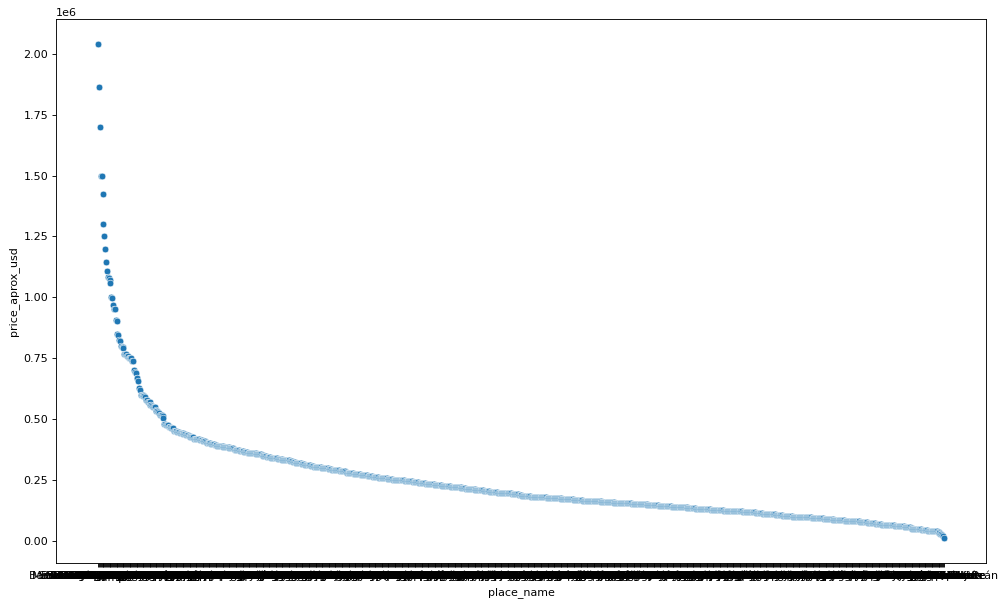

In [56]:
fig, ax = plt.subplots(figsize=(15,9), dpi= 80)
sns.scatterplot(x='place_name',y='price_aprox_usd',data=price_mean);

In [ ]:
#medimos la dispersion del precio por barrio y mostramos los 5 barros con mayor dispersion
disp=data_properati.groupby('place_name')['price_per_m2_x'].apply(lambda x : x.std()/x.mean()).sort_values(ascending= False)
dispdf=pd.DataFrame(disp).reset_index()
dispdf.head(5)

### Creación de nuevas variables
___

# Trabajo practico número 2
___

## Selección de datos
___

In [6]:
from sklearn.model_selection import train_test_split

#Despues de escoger con que datos se van a trabajar
target = 0
features = 0
Xtrain, Xtest, ytrain, ytest = train_test_split(features, target, random_state=1)


## Desarrollo regresión lineal
___

In [7]:
from statistics import mode
from sklearn.linear_model import LinearRegression
model_reg_line = LinearRegression
model_reg_line.fit(Xtrain, ytrain)

In [ ]:
target_predict = model_reg_line.prefict(Xtest)

## Evaluación regresión lineal
___

In [8]:
from sklearn import metrics
r2 = r2_score(ytest, target_predict)